In [ ]:
import re, pandas as pd, numpy as np, requests, bs4, matplotlib.pyplot as plt
import wordcloud, nltk
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, precision_score, accuracy_score
import wordcloud
import text_mining_utils as tm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 


nltk.download('stopwords')

In [ ]:
corpus = pd.read_csv('corpus.csv')
corpus

### Derive word/token statistics for each category and explain what they indicate

In [3]:
documents = list(corpus.Article)

In [4]:
baseline_count_matrix = tm.build_count_matrix(documents)
baseline_count_matrix

,NBA,'s,Top,100,Players,for,2019-20,:,Ranking,the,...,encompassed,blessed,2021.If,clicking,HERE,healthy.Fill,commenting,WordPress.com,Notify,Δ
0,3.0,3.0,4.0,3.0,1.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.0,12.0,3.0,3.0,2.0,14.0,0.0,12.0,1.0,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,16.0,0.0,8.0,0.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,17.0,0.0,0.0,0.0,13.0,0.0,8.0,0.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.0,3.0,0.0,0.0,0.0,10.0,0.0,18.0,0.0,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,53.0,0.0,0.0,0.0,13.0,0.0,13.0,0.0,179.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
attributes = sorted(set(list(baseline_count_matrix.columns)))
print(attributes)

['!', '#', '$', '%', '&', "'", "''", "'08", "'40s", "'60s", "'70s", "'80s", "'90s", "'Age", "'Aquaman", "'Batman", "'Born", "'But", "'Civil", "'ComicsNew", "'Dallas", "'Daredevil", "'Dark", "'Days", "'Iron", "'Jessica", "'Jordan", "'Luke", "'Marvel", "'Morbius'TV", "'Norman", "'S", "'Shang-Chi", "'Sinestro", "'The", "'This", "'Whatever", "'Whose", "'With", "'Year", "'d", "'girl", "'gram", "'ll", "'m", "'ol", "'re", "'s", "'super", "'trials", "'ve", '(', ')', '*', '+/-', '+/-2', '+/-3', '+/-5', '+10.8', '+12', '+13', '+155', '+17.1', '+185', '+24.8', '+24.9', '+4-110-4.5-110Sat', '+4.1', '+4.5-110-4.5-110Sat', '+450', '+5.9', '+500', '+8', ',', ',7.6', '-', '--', '-1.1', '-180', '-195', '-2.8', '-4', '-4.5', '-6', '-8', '-a', '-ing', '-style', '.', '..', '...', '....', '.497/.436/.888', '.542/.392/.844', '.8', '.844', '.877', '.984', '.Acquired', '.After', '.Also', '.Although', '.And', '.Antetokounmpo', '.As', '.Before', '.Beyond', '.But', '.By', '.Chip', '.Collected', '.Comic', '.Danil

In [6]:
dc_text = ' '.join(corpus.Article[corpus.Class == 'DC'])
marv_text = ' '.join(corpus.Article[corpus.Class == 'Marvel'])
nba_text = ' '.join(corpus.Article[corpus.Class == 'NBA'])

In [7]:
tm.print_n_mostFrequent("DC", dc_text, 10)
tm.print_n_mostFrequent("MARVEL", marv_text, 10)
tm.print_n_mostFrequent("NBA", nba_text, 10)

10 most frequent tokens in DC:  [(',', 3422), ('the', 3242), ('of', 2119), ('and', 1806), ('.', 1735), ('a', 1375), ('to', 1318), ('’', 1093), ('in', 895), ('s', 792)]
	Frequency of "," is 0.04813751969390052
	Frequency of "the" is 0.045605446770200314
	Frequency of "of" is 0.02980812514067072
	Frequency of "and" is 0.02540513166779203
	Frequency of "." is 0.024406369570110286
	Frequency of "a" is 0.01934222372270988
	Frequency of "to" is 0.018540400630204817
	Frequency of "’" is 0.015375309475579564
	Frequency of "in" is 0.01259002925950934
	Frequency of "s" is 0.01114112086428089
10 most frequent tokens in MARVEL:  [(',', 2823), ('the', 2286), ('of', 1526), ('and', 1469), ('.', 1419), ('to', 1043), ('a', 1017), ('’', 826), (':', 725), ('in', 723)]
	Frequency of "," is 0.048903440390811764
	Frequency of "the" is 0.039600873090115375
	Frequency of "of" is 0.02643522849322662
	Frequency of "and" is 0.025447805148459967
	Frequency of "." is 0.024581644319717284
	Frequency of "to" is 0.01

In [8]:
tm.print_common_tokens([dc_text, marv_text, nba_text]) 

============ Common Features ==========
 2419 
 ['!' '#' '$' ... '“' '”' '…'] 



### Use visualisations techniques (e.g., bar charts, word clouds) and identify frequently occuring terms, potential stop words, synonyms, concepts, and word variations comment on each topic/category

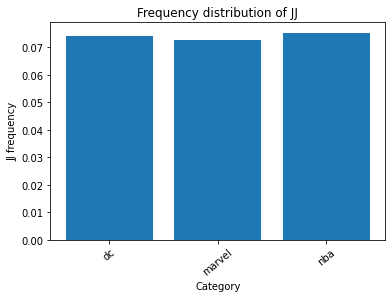

In [9]:
texts = [dc_text, marv_text, nba_text]
tm.plot_POS_freq(texts, 'JJ', ['dc', 'marvel', 'nba'])

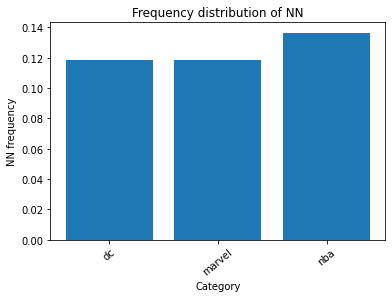

In [10]:
tm.plot_POS_freq(texts, 'NN', ['dc', 'marvel', 'nba'])

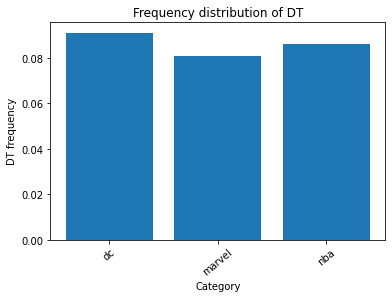

In [11]:
tm.plot_POS_freq(texts, 'DT', ['dc', 'marvel', 'nba'])

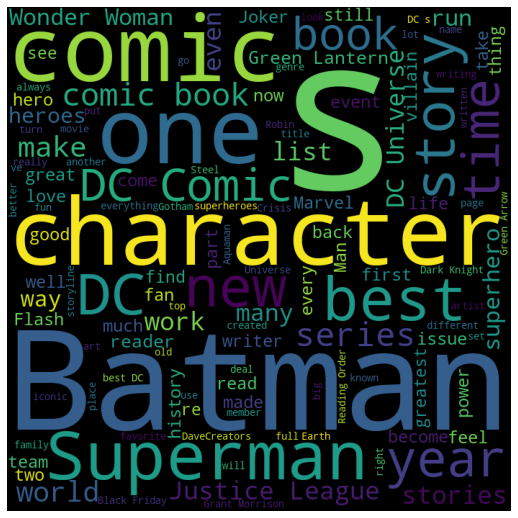

In [12]:
tm.generate_cloud(dc_text)

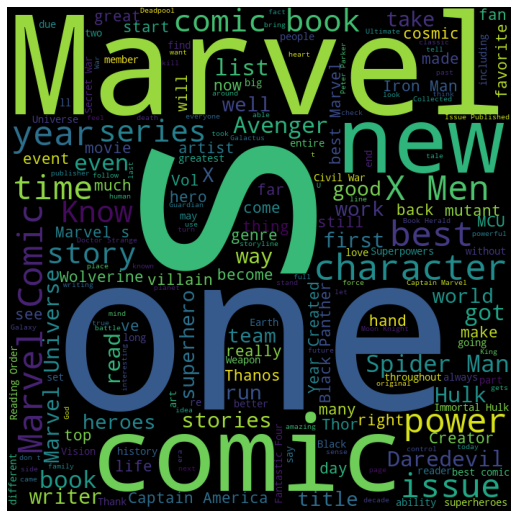

In [13]:
tm.generate_cloud(marv_text)


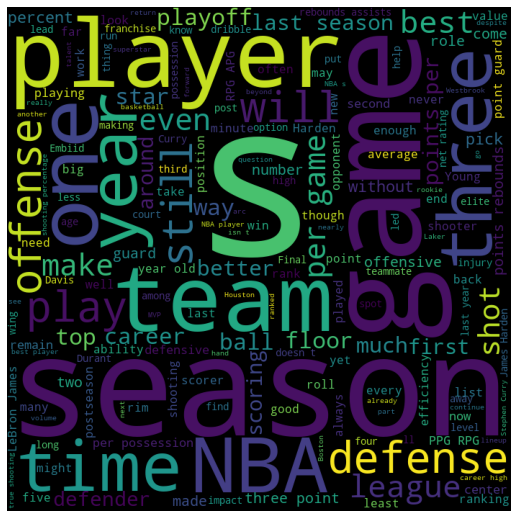

In [14]:
tm.generate_cloud(nba_text)


###  Use 2 clustering algorithms with 2 different linkage schemes (e.g., minimum linkage vs. maximum linkage) and 2 different measures (e.g., symmetric vs. cosine) to identify the main clusters; give details of the algorithms, schemes and measures you tried, and what the results were: do they accurately identify the three clusters of text documents? If not, analyse the results to determine why not

In [15]:
baseline_tfidf_matrix = tm.build_tfidf_matrix(documents)
baseline_tfidf_matrix

,NBA,'s,Top,100,Players,for,2019-20,:,Ranking,the,...,encompassed,blessed,2021.If,clicking,HERE,healthy.Fill,commenting,WordPress.com,Notify,Δ
0,0.045809,0.022189,0.069084,0.069865,0.028340,0.001588,0.088876,0.004207,0.031046,0.010233,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000696,0.000000,0.001845,0.000000,0.003263,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.007770,0.004106,0.002397,0.003232,0.002622,0.001029,0.000000,0.001168,0.001436,0.004820,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000318,0.000000,0.000000,0.000000,0.001093,0.000000,0.000724,0.000000,0.003241,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.000000,0.008928,0.000000,0.000000,0.000000,0.001466,0.000000,0.001195,0.000000,0.006341,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
86,0.000000,0.000738,0.000000,0.000000,0.000000,0.000528,0.000000,0.001259,0.000000,0.004485,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
87,0.055198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001521,0.000000,0.006725,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
88,0.000000,0.015018,0.000000,0.000000,0.000000,0.000791,0.000000,0.001048,0.000000,0.006379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
y= corpus.Class
print(y)

0        NBA
1     Marvel
2         DC
3        NBA
4         DC
       ...  
85        DC
86    Marvel
87       NBA
88        DC
89    Marvel
Name: Class, Length: 90, dtype: object


In [17]:
agg_single_cosine = AgglomerativeClustering(n_clusters=3, affinity='cosine',
                                     linkage='single')
agg_single_cosine.fit(baseline_tfidf_matrix)
agg_single_cosine_labels = agg_single_cosine.labels_
print(agg_single_cosine_labels)
print(list(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
['NBA', 'Marvel', 'DC', 'NBA', 'DC', 'NBA', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'DC', 'NBA', 'DC', 'Marvel', 'DC', 'DC', 'DC', 'NBA', 'NBA', 'DC', 'Marvel', 'DC', 'Marvel', 'DC', 'NBA', 'Marvel', 'NBA', 'NBA', 'NBA', 'Marvel', 'NBA', 'NBA', 'Marvel', 'Marvel', 'NBA', 'DC', 'DC', 'Marvel', 'DC', 'Marvel', 'NBA', 'NBA', 'NBA', 'NBA', 'NBA', 'Marvel', 'NBA', 'DC', 'DC', 'Marvel', 'Marvel', 'DC', 'NBA', 'Marvel', 'Marvel', 'Marvel', 'Marvel', 'DC', 'NBA', 'Marvel', 'Marvel', 'Marvel', 'NBA', 'NBA', 'DC', 'Marvel', 'NBA', 'DC', 'Marvel', 'DC', 'NBA', 'NBA', 'Marvel', 'Marvel', 'NBA', 'NBA', 'DC', 'NBA', 'DC', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'DC', 'Marvel', 'NBA', 'DC', 'Marvel']


In [18]:
agg_single_symmetric = AgglomerativeClustering(n_clusters=3, affinity='manhattan',
                                     linkage='single')
agg_single_symmetric.fit(baseline_tfidf_matrix)
agg_single_symmetric_labels = agg_single_symmetric.labels_
print(agg_single_symmetric_labels)
print(list(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
['NBA', 'Marvel', 'DC', 'NBA', 'DC', 'NBA', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'DC', 'NBA', 'DC', 'Marvel', 'DC', 'DC', 'DC', 'NBA', 'NBA', 'DC', 'Marvel', 'DC', 'Marvel', 'DC', 'NBA', 'Marvel', 'NBA', 'NBA', 'NBA', 'Marvel', 'NBA', 'NBA', 'Marvel', 'Marvel', 'NBA', 'DC', 'DC', 'Marvel', 'DC', 'Marvel', 'NBA', 'NBA', 'NBA', 'NBA', 'NBA', 'Marvel', 'NBA', 'DC', 'DC', 'Marvel', 'Marvel', 'DC', 'NBA', 'Marvel', 'Marvel', 'Marvel', 'Marvel', 'DC', 'NBA', 'Marvel', 'Marvel', 'Marvel', 'NBA', 'NBA', 'DC', 'Marvel', 'NBA', 'DC', 'Marvel', 'DC', 'NBA', 'NBA', 'Marvel', 'Marvel', 'NBA', 'NBA', 'DC', 'NBA', 'DC', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'DC', 'Marvel', 'NBA', 'DC', 'Marvel']


In [19]:
agg_complete_cosine = AgglomerativeClustering(n_clusters=3, affinity='cosine',
                                     linkage='complete')
agg_complete_cosine.fit(baseline_tfidf_matrix)
agg_complete_cosine_labels = agg_complete_cosine.labels_
print(agg_complete_cosine_labels)
print(list(y))

[0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]
['NBA', 'Marvel', 'DC', 'NBA', 'DC', 'NBA', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'DC', 'NBA', 'DC', 'Marvel', 'DC', 'DC', 'DC', 'NBA', 'NBA', 'DC', 'Marvel', 'DC', 'Marvel', 'DC', 'NBA', 'Marvel', 'NBA', 'NBA', 'NBA', 'Marvel', 'NBA', 'NBA', 'Marvel', 'Marvel', 'NBA', 'DC', 'DC', 'Marvel', 'DC', 'Marvel', 'NBA', 'NBA', 'NBA', 'NBA', 'NBA', 'Marvel', 'NBA', 'DC', 'DC', 'Marvel', 'Marvel', 'DC', 'NBA', 'Marvel', 'Marvel', 'Marvel', 'Marvel', 'DC', 'NBA', 'Marvel', 'Marvel', 'Marvel', 'NBA', 'NBA', 'DC', 'Marvel', 'NBA', 'DC', 'Marvel', 'DC', 'NBA', 'NBA', 'Marvel', 'Marvel', 'NBA', 'NBA', 'DC', 'NBA', 'DC', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'DC', 'Marvel', 'NBA', 'DC', 'Marvel']


In [20]:
agg_complete_symmetry = AgglomerativeClustering(n_clusters=3, affinity='manhattan',
                                     linkage='complete')
agg_complete_symmetry.fit(baseline_tfidf_matrix)
agg_complete_symmetry_labels = agg_complete_symmetry.labels_
print(agg_complete_symmetry_labels)
print(list(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
['NBA', 'Marvel', 'DC', 'NBA', 'DC', 'NBA', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'DC', 'NBA', 'DC', 'Marvel', 'DC', 'DC', 'DC', 'NBA', 'NBA', 'DC', 'Marvel', 'DC', 'Marvel', 'DC', 'NBA', 'Marvel', 'NBA', 'NBA', 'NBA', 'Marvel', 'NBA', 'NBA', 'Marvel', 'Marvel', 'NBA', 'DC', 'DC', 'Marvel', 'DC', 'Marvel', 'NBA', 'NBA', 'NBA', 'NBA', 'NBA', 'Marvel', 'NBA', 'DC', 'DC', 'Marvel', 'Marvel', 'DC', 'NBA', 'Marvel', 'Marvel', 'Marvel', 'Marvel', 'DC', 'NBA', 'Marvel', 'Marvel', 'Marvel', 'NBA', 'NBA', 'DC', 'Marvel', 'NBA', 'DC', 'Marvel', 'DC', 'NBA', 'NBA', 'Marvel', 'Marvel', 'NBA', 'NBA', 'DC', 'NBA', 'DC', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'DC', 'Marvel', 'NBA', 'DC', 'Marvel']


In [28]:
#do k++ clustering
km_plus = KMeans(n_clusters=3, random_state=1, )
km_plus.fit(baseline_tfidf_matrix)
km_plus.fit_predict(baseline_tfidf_matrix)
#obtain the labels
plus_cluster_labels = km_plus.labels_
##compare the cluster labels with the actual labels
print(plus_cluster_labels)
print(list(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
['NBA', 'Marvel', 'DC', 'NBA', 'DC', 'NBA', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'DC', 'NBA', 'DC', 'Marvel', 'DC', 'DC', 'DC', 'NBA', 'NBA', 'DC', 'Marvel', 'DC', 'Marvel', 'DC', 'NBA', 'Marvel', 'NBA', 'NBA', 'NBA', 'Marvel', 'NBA', 'NBA', 'Marvel', 'Marvel', 'NBA', 'DC', 'DC', 'Marvel', 'DC', 'Marvel', 'NBA', 'NBA', 'NBA', 'NBA', 'NBA', 'Marvel', 'NBA', 'DC', 'DC', 'Marvel', 'Marvel', 'DC', 'NBA', 'Marvel', 'Marvel', 'Marvel', 'Marvel', 'DC', 'NBA', 'Marvel', 'Marvel', 'Marvel', 'NBA', 'NBA', 'DC', 'Marvel', 'NBA', 'DC', 'Marvel', 'DC', 'NBA', 'NBA', 'Marvel', 'Marvel', 'NBA', 'NBA', 'DC', 'NBA', 'DC', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'DC', 'Marvel', 'NBA', 'DC', 'Marvel']


In [ ]:
#do k++ clustering
km_plus = KMeans(n_clusters=3, random_state=1, )
km_plus.fit(baseline_tfidf_matrix)
km_plus.fit_predict(baseline_tfidf_matrix)
#obtain the labels
plus_cluster_labels = km_plus.labels_
##compare the cluster labels with the actual labels
print(plus_cluster_labels)
print(list(y))